 Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [119]:
# Import Dataset
airline=pd.read_excel('/content/Airlines+Data.xlsx')
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Data Exploration

In [120]:
airline.isnull().any()

Month         False
Passengers    False
dtype: bool

In [121]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

<Axes: >

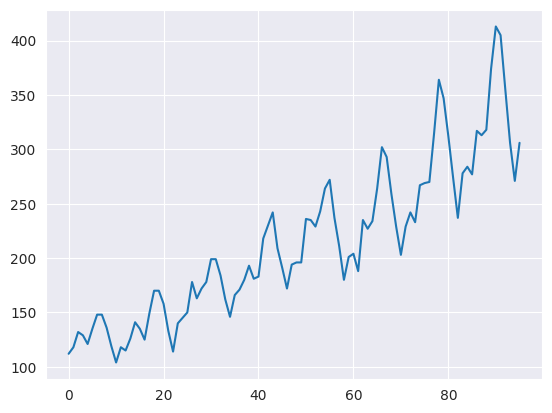

In [122]:
airline.Passengers.plot()

In [123]:
len(airline['Passengers'])

96

 Descriptive Analysis

In [124]:
airline.shape

(96, 2)

In [125]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [126]:
#Unique values for every feature
airline.nunique()

Month         96
Passengers    80
dtype: int64

In [127]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [128]:
airline[airline.duplicated()]

,Month,Passengers


In [129]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


Feature Engineering

In [130]:
airline.rename({'Month':'Date'},axis=1, inplace=True)

In [131]:
df1 = airline.copy()
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

Data Visualization

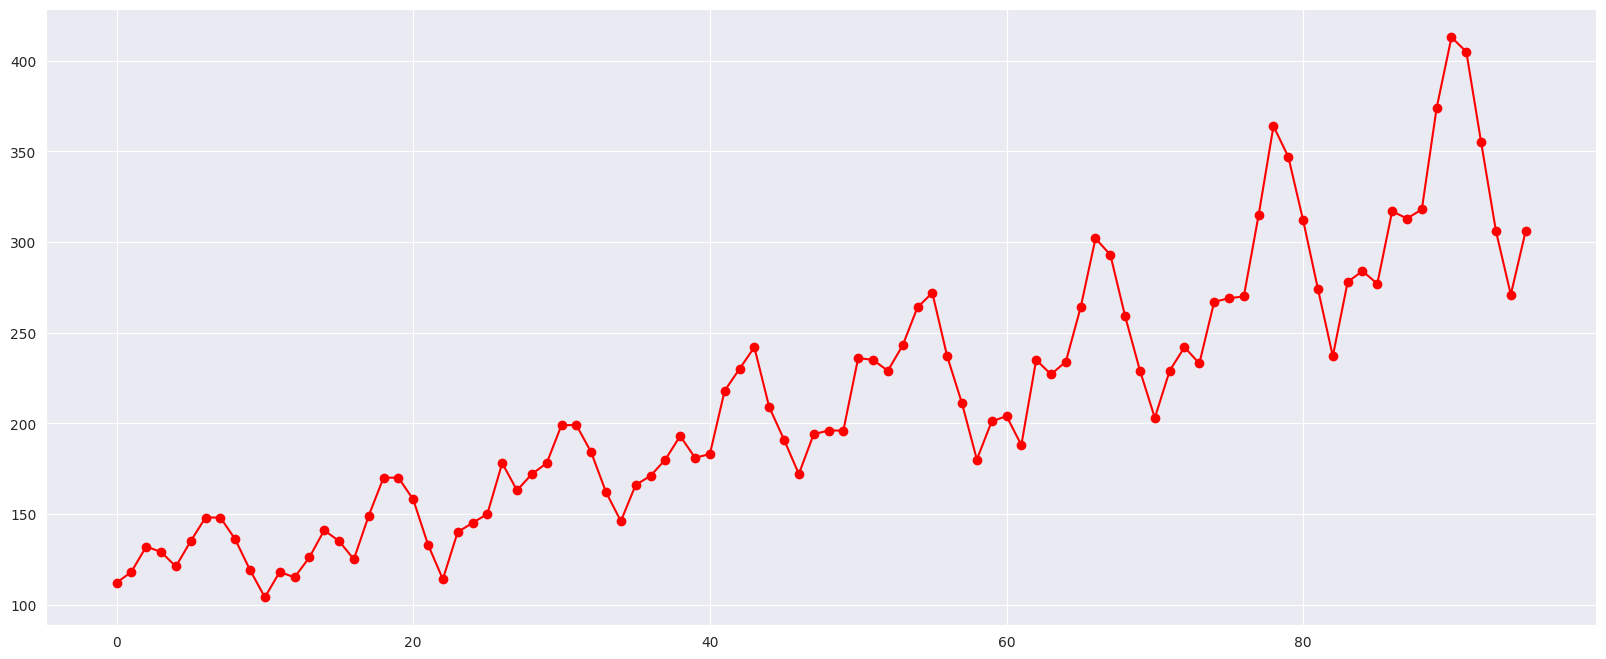

In [132]:
airline['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

Histogram and Density Plots

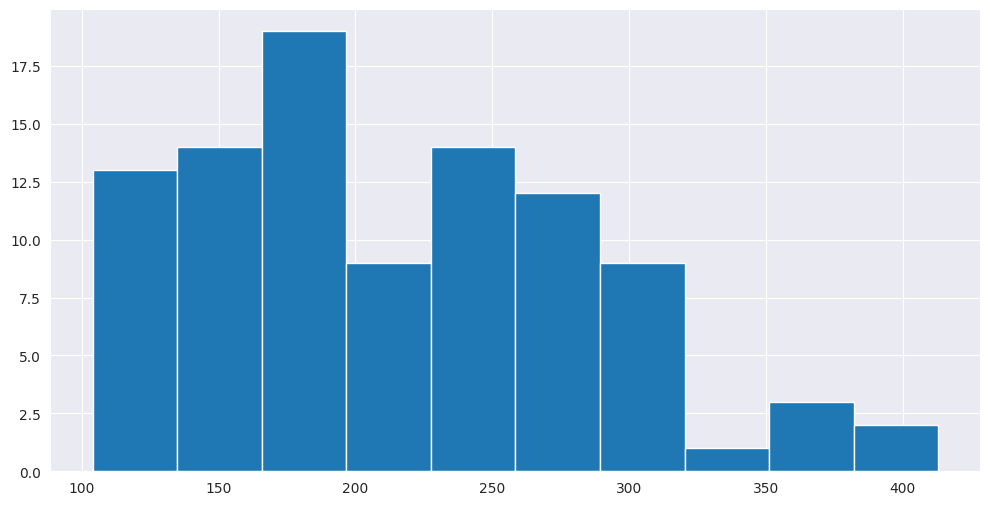

In [133]:
airline.Passengers.hist(figsize=(12,6))
plt.show()

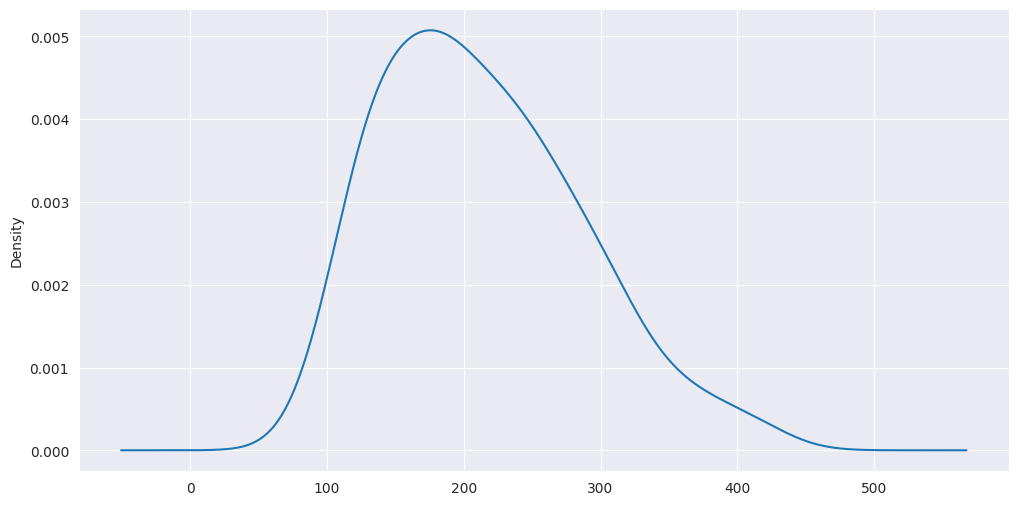

In [134]:
# create a density plot
airline.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

Moving Average

In [135]:
#month
list(range(2,24,6))

[2, 8, 14, 20]

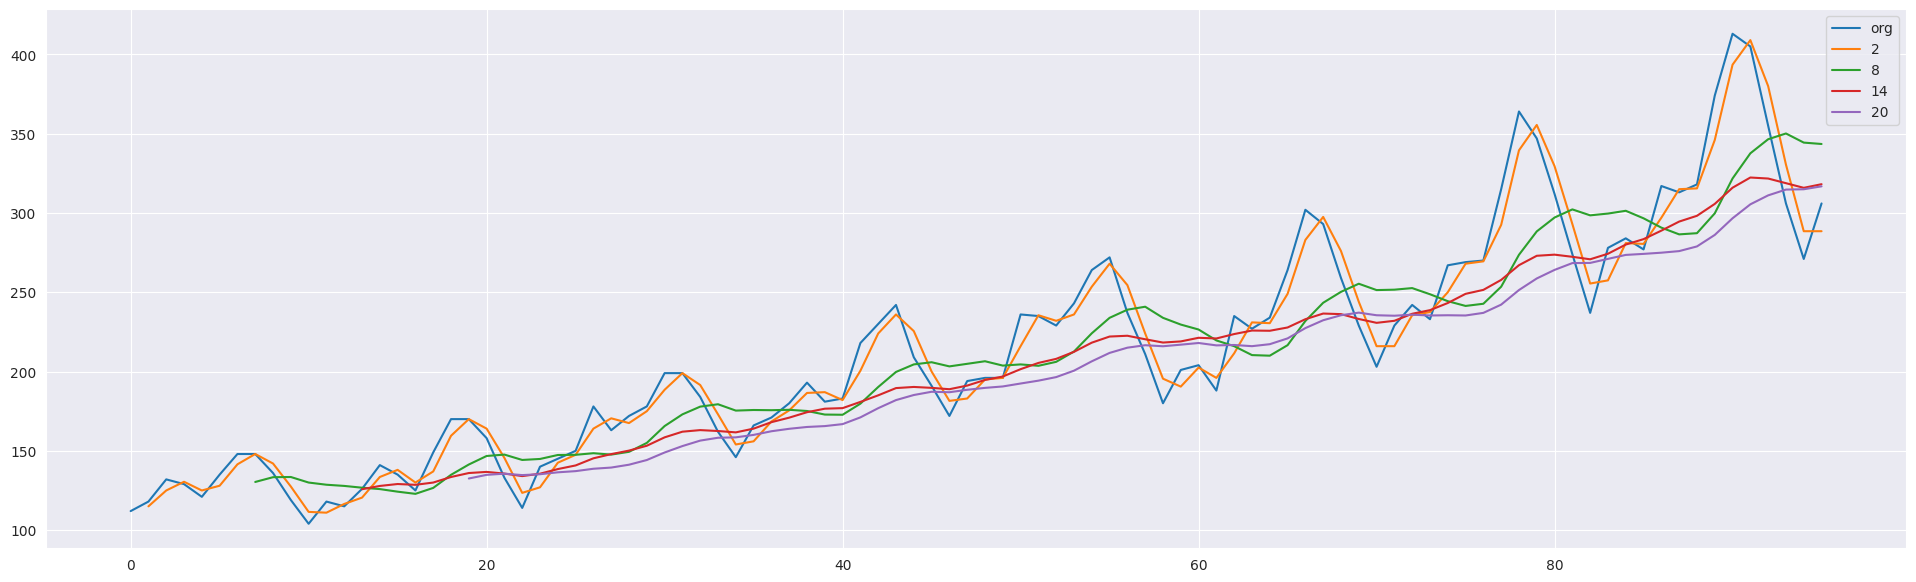

In [136]:
plt.figure(figsize=(24,7))
airline.Passengers.plot(label='org')
for i in range(2,24,6):
  airline['Passengers'].rolling(i).mean().plot(label=str(i))

plt.legend(loc='best')

Time series decomposition plot

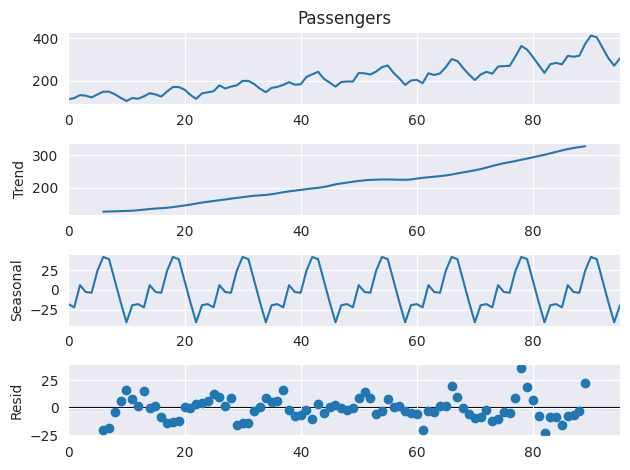

In [137]:
decompose_ts_add= seasonal_decompose(airline.Passengers, period=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

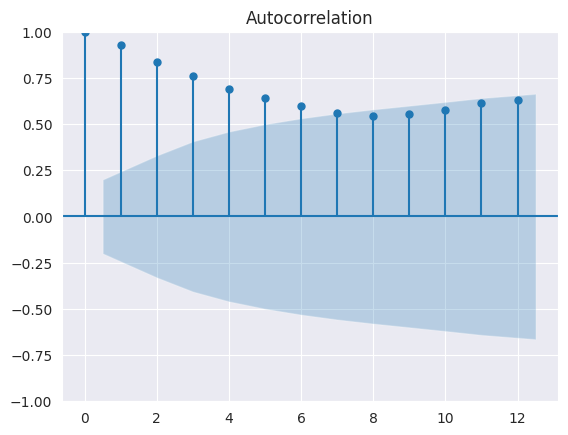

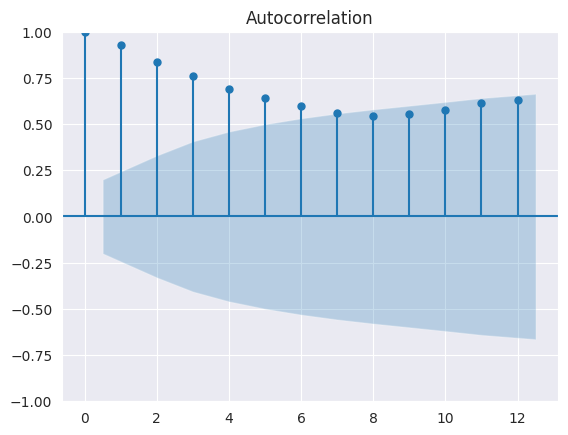

In [138]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers, lags=12)

Evaluation Metric MAPE

In [139]:
# Mean Asolute Percentage Error
def MAPE(pred, org):
  temp = np.abs((pred-org)/ org)*100
  return np.mean(temp)

In [140]:
# Weihted Moving Average
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': range(100,30,-5)})
weights = np.array([0.1,0.2,0.3,0.4])
df['MA']=df['X'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [141]:
df = pd.DataFrame()
df['Month']=airline['Date']
df['Passengers']=airline['Passengers']
weights = np.array([0.1,0.2,0.3,0.4])
df['AMA']=df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Month,Passengers,AMA
0,1995-01-01,112,NaN
1,1995-02-01,118,NaN
2,1995-03-01,132,NaN
3,1995-04-01,129,126.0
4,1995-05-01,121,125.3
...,...,...,...
91,2002-08-01,405,392.5
92,2002-09-01,355,383.5
93,2002-10-01,306,351.2
94,2002-11-01,271,311.7


Splitting

In [142]:
size = 72
train_data = df1[:size]
test_data = df1[size:]

In [143]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


# Exponential Methods

Simple Exponential 

Using Forecast Attribute

In [144]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [145]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 23.382283350045057 
 Train Root Mean Squared Error = 19.03177173091111 
 Test Root Mean Squared Error = 91.11325402904487


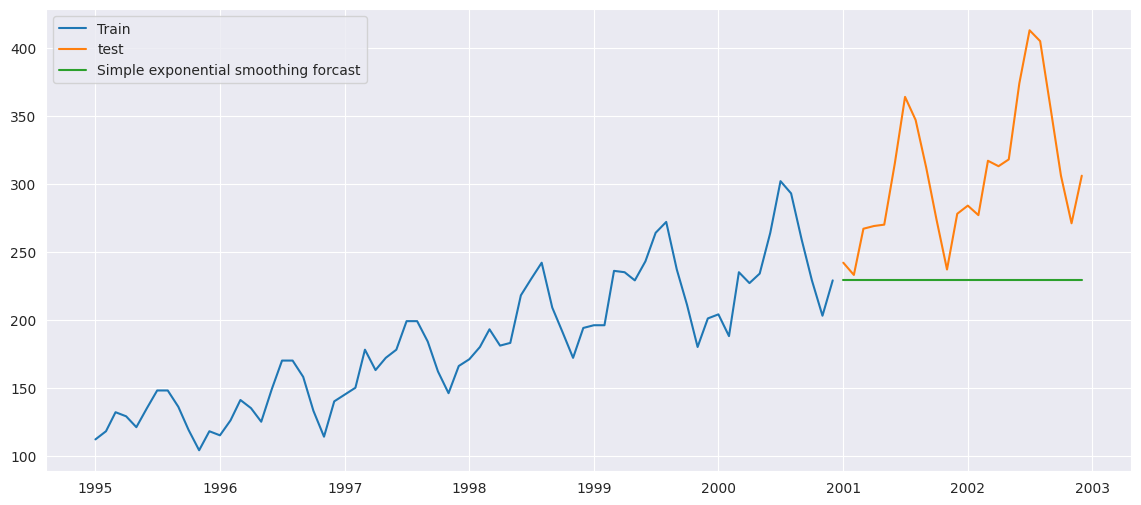

In [146]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


Holt method (Double Exponential)

In [147]:
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 17.12220875270047 
 Train Root Mean Squared Error = 18.9612923452262 
 Test Root Mean Squared Error = 71.55255166207006


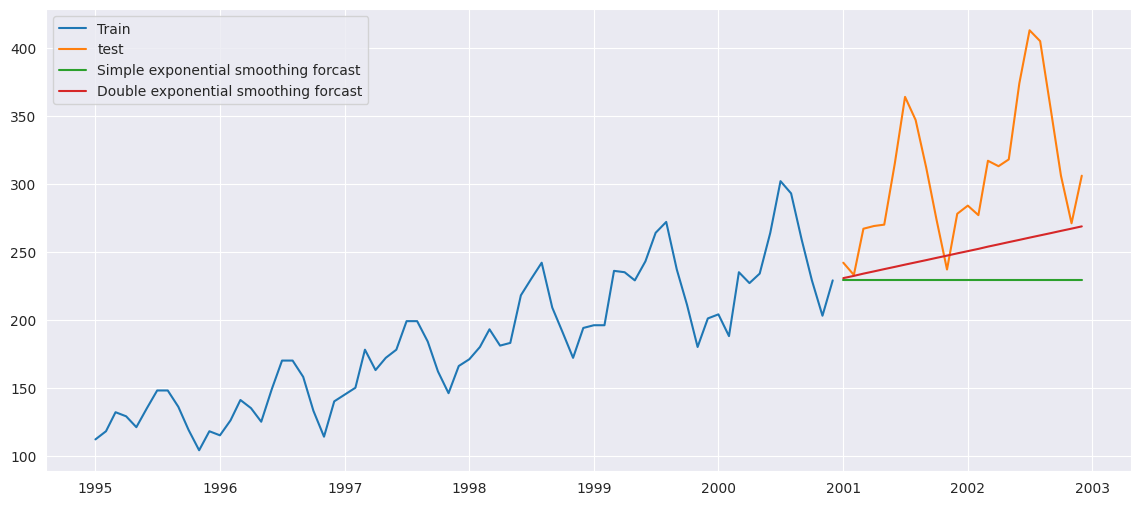

In [148]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

In [149]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Passengers))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 13.341866948862238 
 Train Root Mean Squared Error = 12.755539751240624 
 Test Root Mean Squared Error = 48.34208410593296
